In [9]:
!pip install tensorflow==2.14 keras==2.14 tensorflow-addons==0.21

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import tensorflow_addons as tfa
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import itertools
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from datetime import datetime
from packaging import version
import tensorboard


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification

!unzip intel-image-classification.zip


# Load
data_dir = "intel-image-classification"
img_height, img_width = 150, 150
batch_size = 32


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    "/content/seg_test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
val_data = datagen.flow_from_directory(
    "/content/seg_test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jpg  
  inflating: seg_train/seg_train/mountain/7695.jpg  
  inflating: seg_train/seg_train/mountain/7698.jp

In [5]:

# CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=train_data.num_classes, average='macro')])


In [7]:

# TensorBoard
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=f"logs/fit/{datetime.now().strftime('%Y%m%d-%H%M%S')}", histogram_freq=1)

# Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    batch_size=32,
    callbacks=[tensorboard_callback]
)


Epoch 1/5
75/75 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000 - f1_score: 1.0000

/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 138s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - f1_score: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_f1_score: 1.0000
Epoch 2/5
75/75 [==============================] - 138s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - f1_score: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_f1_score: 1.0000
Epoch 3/5
75/75 [==============================] - 136s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - f1_score: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_f1_score: 1.0000
Epoch 4/5
75/75 [==============================] - 137s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - f1_score: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_f1_score: 1.0000
Epoch 5/5
75/75 [==============================] - 133s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - f1_score: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_f1_score: 1.0000


1/1 [==============================] - 0s 341ms/step
              precision    recall  f1-score   support

    seg_test       1.00      1.00      1.00       600

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


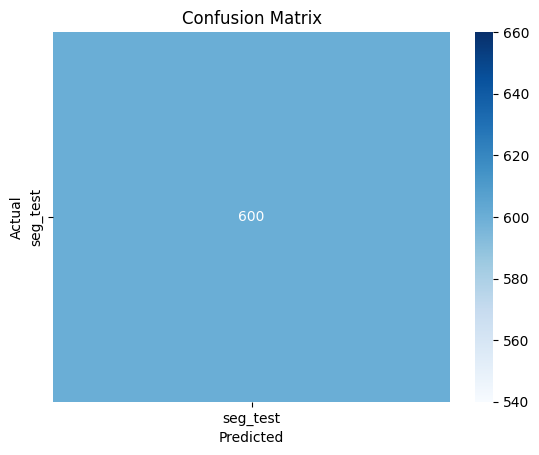

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


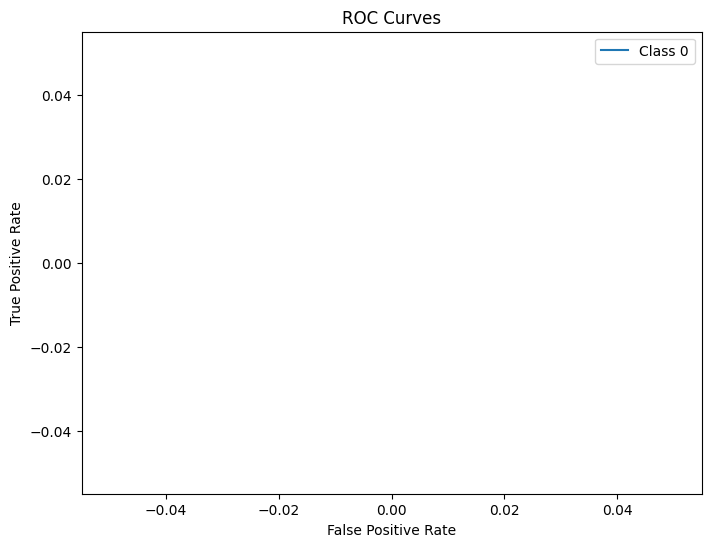

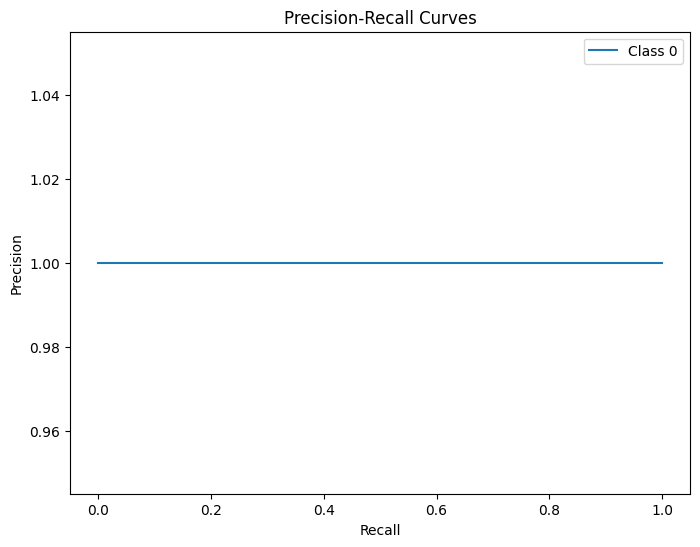

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:

# Evaluate Model
y_true = []
y_pred = []
y_pred_prob = []

for images, labels in val_data:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_pred_prob.extend(preds)
    y_true.extend(np.argmax(labels, axis=1))
    if len(y_true) >= val_data.samples:
        break


report = classification_report(y_true, y_pred, target_names=train_data.class_indices.keys())
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curves
plt.figure(figsize=(8, 6))
for i in range(train_data.num_classes):
    fpr, tpr, _ = roc_curve(np.array(y_true) == i, np.array(y_pred_prob)[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(8, 6))
for i in range(train_data.num_classes):
    precision, recall, _ = precision_recall_curve(np.array(y_true) == i, np.array(y_pred_prob)[:, i])
    plt.plot(recall, precision, label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

# Save Model
model.save("intel_image_classifier.h5")
